# Mouse gastrulation to erythroid lineage

In [1]:
import scvelo as scv
import seaborn as sns
import numpy as np

In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization

## Read data

In [3]:
adata = scv.datasets.gastrulation_erythroid()
adata

AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

In [4]:
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced']: [0.95 0.05]


AnnData object with n_obs × n_vars = 9815 × 53801
    obs: 'sample', 'stage', 'sequencing.batch', 'theiler', 'celltype'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'MURK_gene', 'Δm', 'scaled Δm'
    uns: 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'

## Gene selection by detection, high variability, normalizing every cell by its initial size and logarithmizing X

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=5000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 5000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:13) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


## Calculating RNA velocity

In [6]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:20) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Plot

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_gastrulation_erythroid_umap_stream.svg


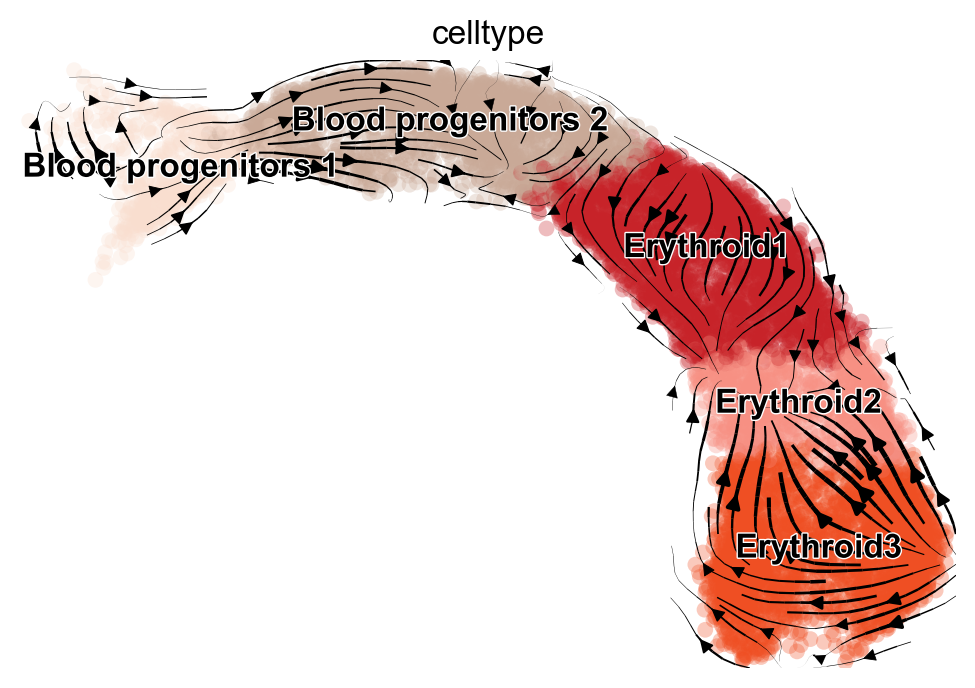

In [8]:
scv.pl.velocity_embedding_stream(adata, basis="umap", color="celltype", save="gastrulation_erythroid_umap_stream.svg")

saving figure to file ./figures/scvelo_gastrulation_erythroid_umap_vector.svg


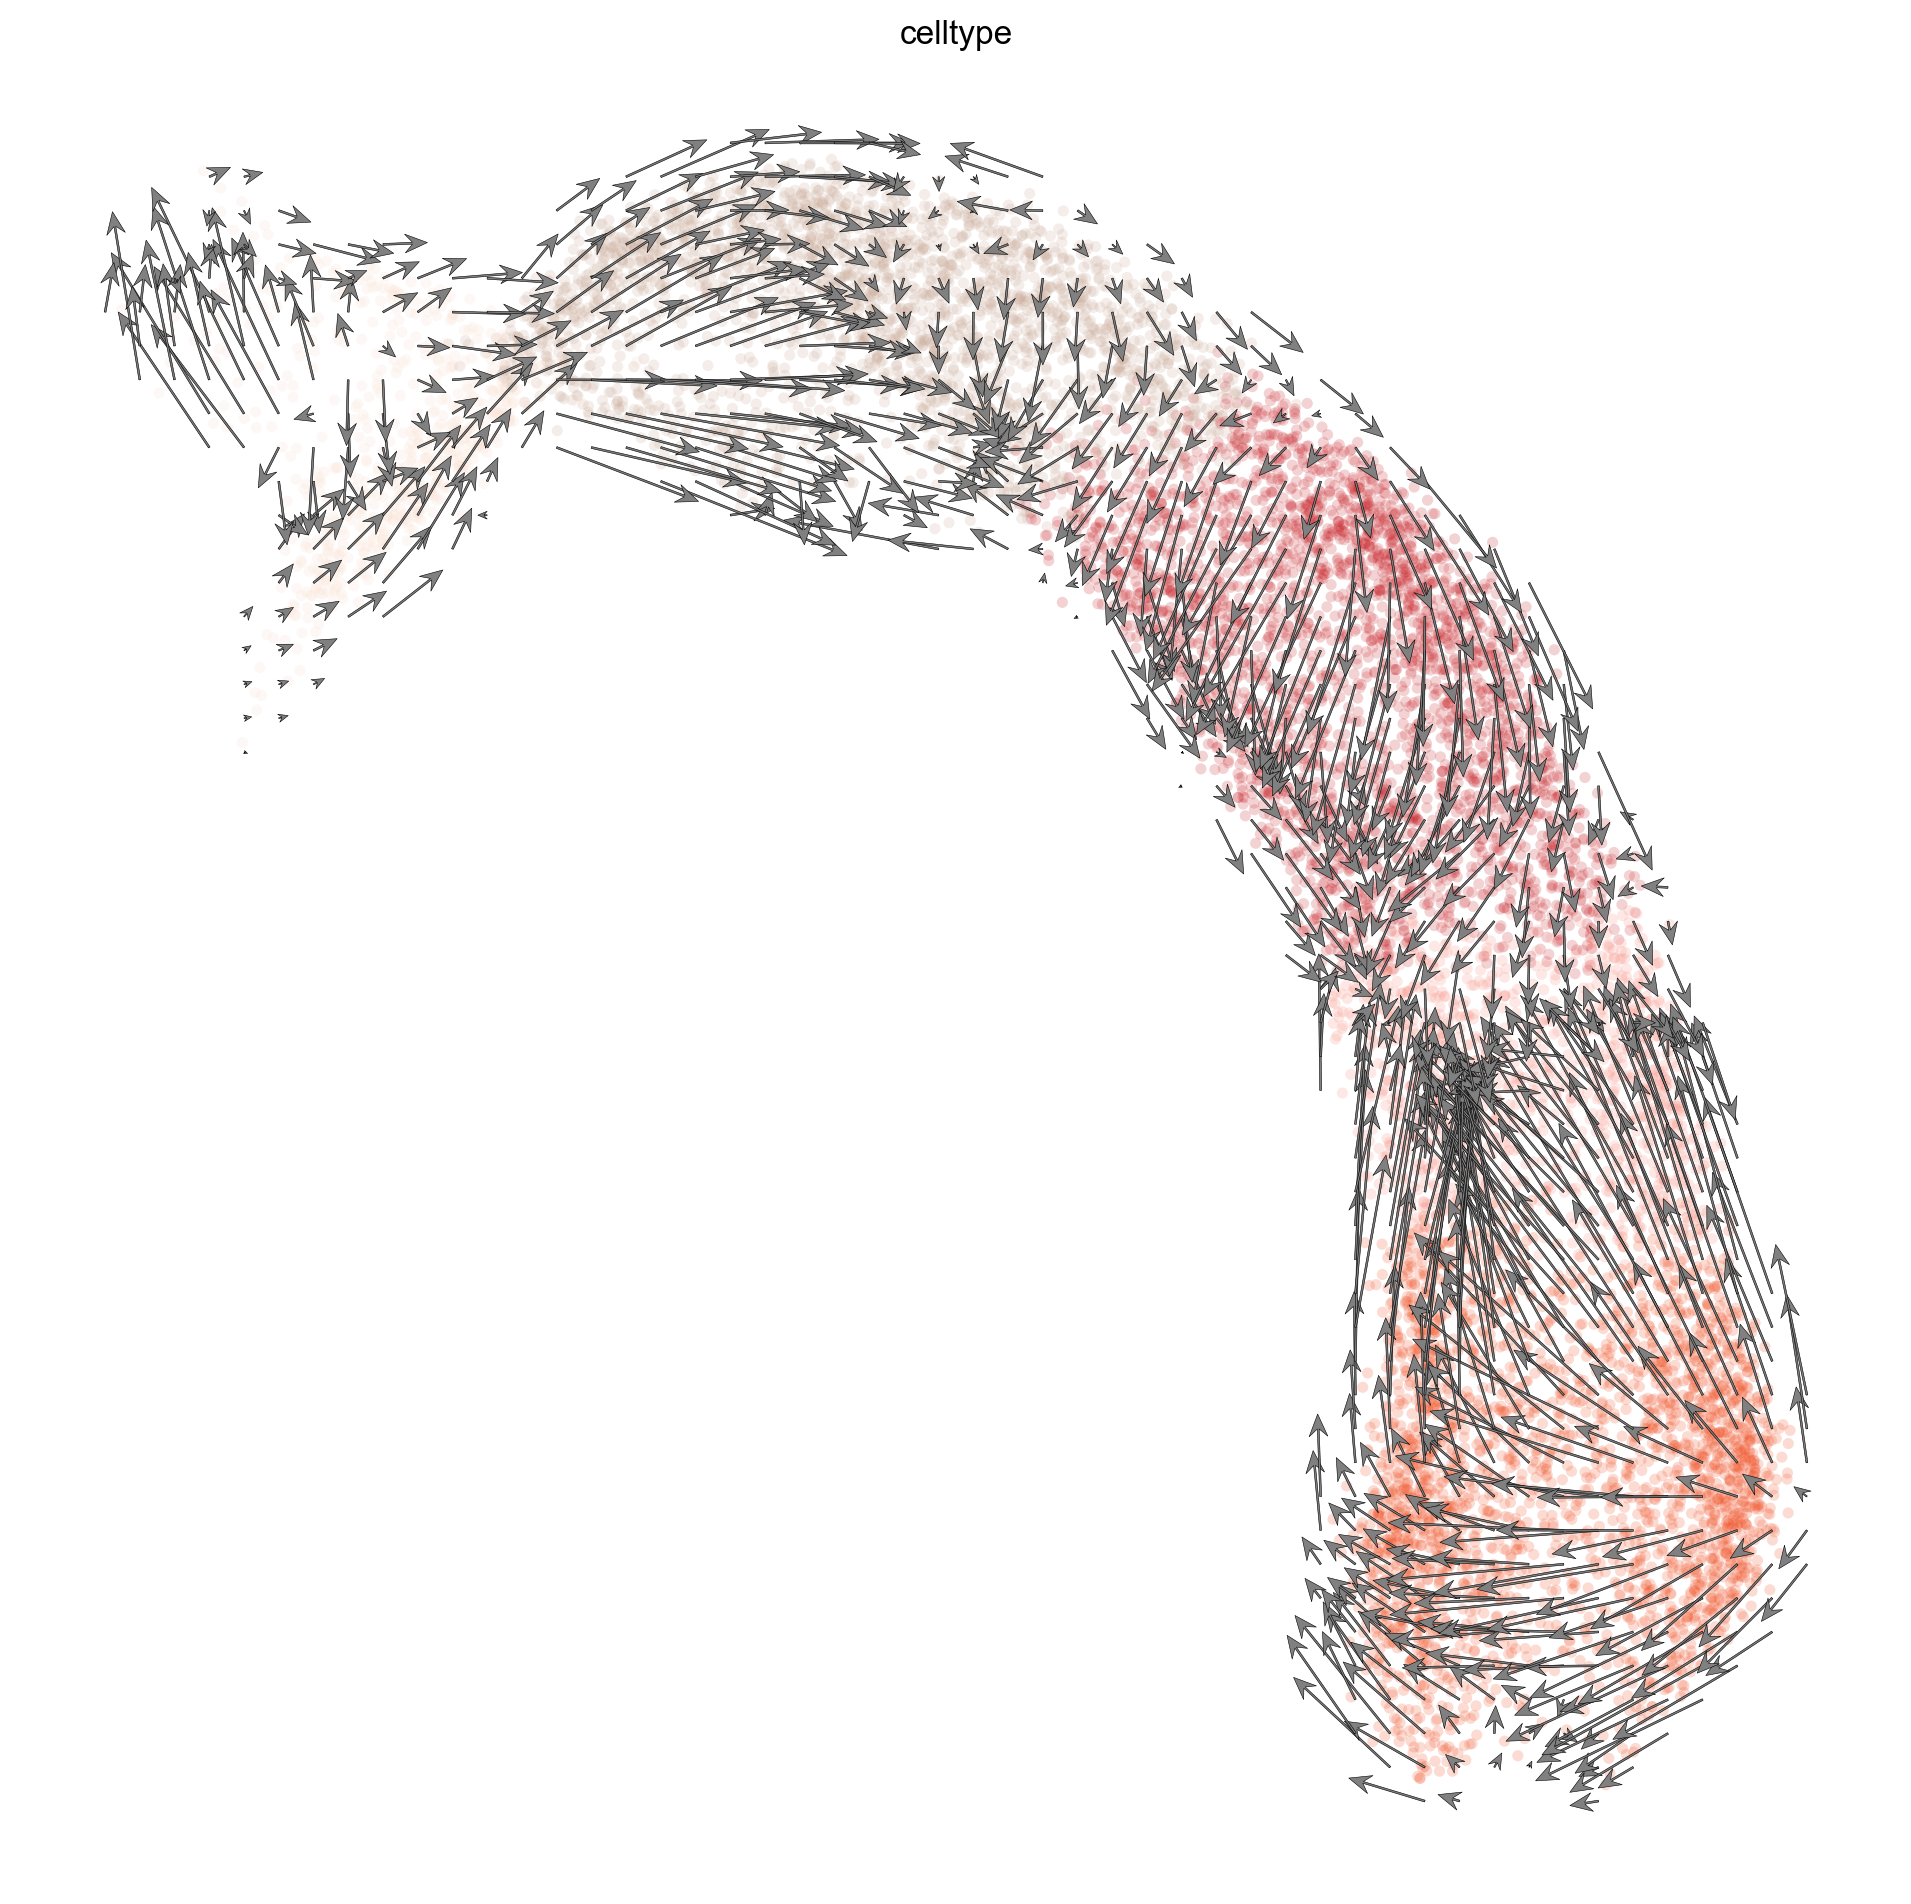

In [9]:
scv.pl.velocity_embedding_grid(adata, basis="umap", color="celltype", figsize=(12, 12), arrow_size=2, arrow_length=5, save="gastrulation_erythroid_umap_vector.svg")

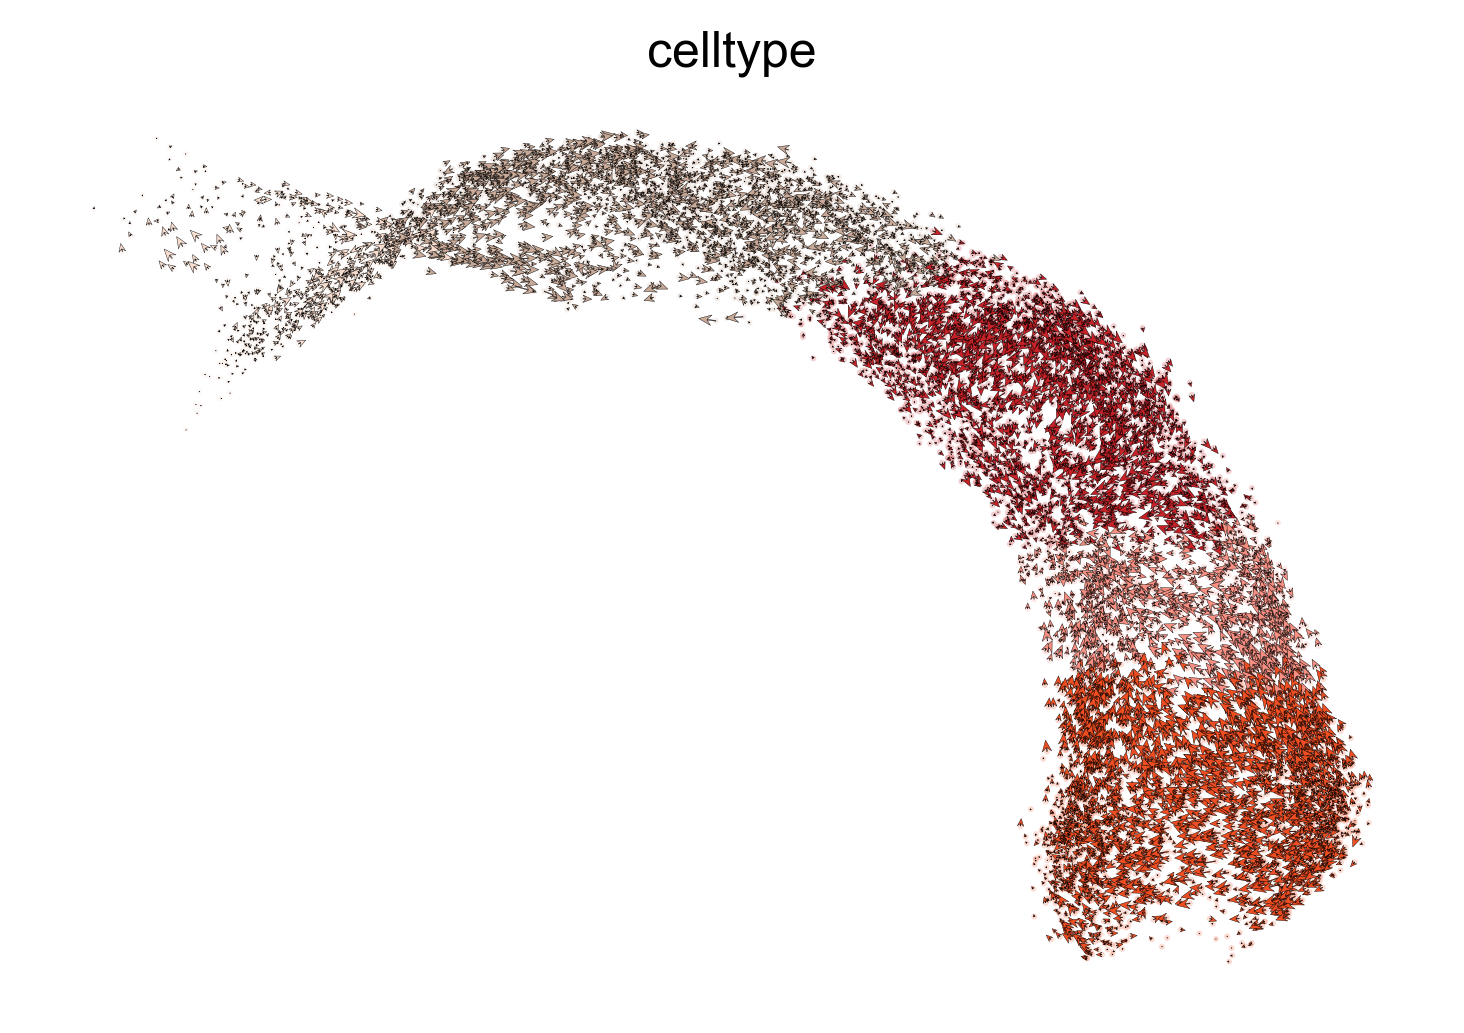

In [10]:
scv.pl.velocity_embedding(adata, basis="umap", color="celltype", arrow_length=2, arrow_size=1.5, dpi=150)

## Latent time

In [11]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/12 cores)
    finished (0:07:08) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [12]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
    finished (0:00:14) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [13]:
adata.layers["velocity"]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

## Plot latent time

In [14]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
    finished (0:00:19) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [15]:
adata.layers["velocity"]

array([[-0.014153  , -0.05402639,  0.0230895 , ..., -0.24959515,
        -0.02007673, -0.10487312],
       [-0.0103548 , -0.0380561 , -0.00578544, ..., -0.12890244,
         0.09924288, -0.00822535],
       [ 0.00075367, -0.07314259, -0.01945704, ..., -0.00954047,
         0.01329801, -0.22030574],
       ...,
       [-0.00146358, -0.02397867,  0.00956641, ...,  0.75078183,
         0.0237584 , -0.01038311],
       [-0.0146879 ,  0.03542008, -0.02090237, ...,  0.5746684 ,
        -0.02075814, -0.03410092],
       [ 0.00513863, -0.05004102, -0.01962285, ...,  0.53349066,
        -0.03137838, -0.09156112]], dtype=float32)

computing terminal states
    identified 3 regions of root cells and 1 region of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:03) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_gastrulation_erythroid_latent_time.svg


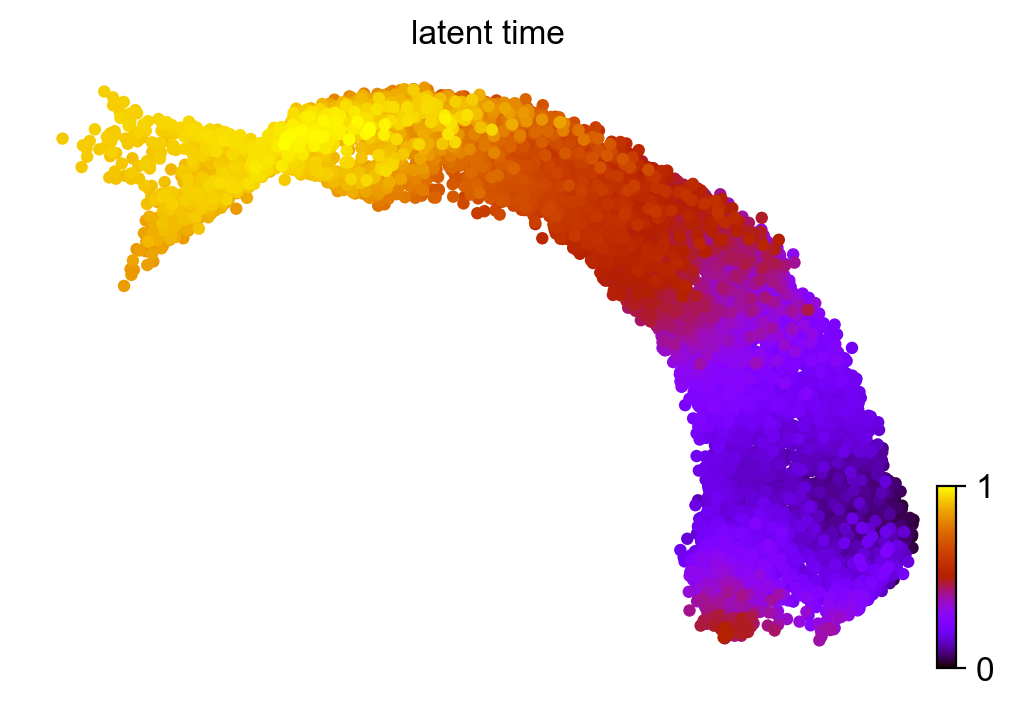

In [16]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80, colorbar=True, save="gastrulation_erythroid_latent_time.svg")

In [17]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, tkey='latent_time', n_convolve=100, col_color='clusters')

KeyError: 'clusters'

In [ ]:
scv.pl.scatter(adata, basis=top_genes[:10], ncols=5)

## Fetch data

In [ ]:
adata

In [ ]:
adata.X

In [ ]:
adata.obs[["clusters", "root_cells", "end_points", "latent_time"]].to_csv("../../results/gastrulation_erythroid/obs.tsv", sep="\t")

In [ ]:
adata.var[["fit_alpha", "fit_beta", "fit_gamma", "fit_t_", "fit_likelihood", "fit_u0", "fit_s0"]].to_csv("../../results/gastrulation_erythroid/genes.tsv", sep="\t")

In [ ]:
adata.varm['loss']

In [ ]:
adata.varm['loss'].shape

In [ ]:
adata.layers["velocity"]

In [ ]:
adata.layers["variance_velocity"]

In [ ]:
adata.layers["Ms"]

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(adata.layers["velocity"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/gastrulation_erythroid/velocity.tsv", sep="\t")

In [ ]:
pd.DataFrame(adata.layers["variance_velocity"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/gastrulation_erythroid/variance_velocity.tsv", sep="\t")

In [ ]:
pd.DataFrame(adata.layers["unspliced"].toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../../results/gastrulation_erythroid/unspliced.tsv", sep="\t")

In [ ]:
adata.layers["unspliced"]

In [ ]:
pd.DataFrame(adata.layers["spliced"].toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../../results/gastrulation_erythroid/spliced.tsv", sep="\t")

In [ ]:
pd.DataFrame(adata.X.toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../../results/gastrulation_erythroid/gene_expr.tsv", sep="\t")

In [ ]:
pd.DataFrame(adata.layers["velocity_u"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/gastrulation_erythroid/velocity_u.tsv", sep="\t")

In [ ]:
pd.DataFrame(adata.layers["Mu"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/gastrulation_erythroid/Mu.tsv", sep="\t")

In [ ]:
pd.DataFrame(adata.layers["Ms"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/gastrulation_erythroid/Ms.tsv", sep="\t")